In [1]:
!pip install shap
!pip install opencv-python
!pip install tensorflow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import numpy as np
from glob import glob
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import shap


In [11]:
IMG_SIZE = (128, 128)
def load_images(folder, label):
    images, labels = [], []
    for img_path in glob(folder + "/*.png"):
        img = cv2.imread(img_path)
        if img is None:
            continue

        img = cv2.resize(img, IMG_SIZE)
        img = img / 255.0
        images.append(img)
        labels.append(label)

    return np.array(images), np.array(labels)

In [12]:
fire_path = '/content/drive/MyDrive/fire_dataset/fire_images'
non_fire_path = '/content/drive/MyDrive/fire_dataset/non_fire_images'

In [13]:
fire_images, fire_labels = load_images(fire_path, 1)
non_fire_images, non_fire_labels = load_images(non_fire_path, 0)

In [14]:

X = np.concatenate((fire_images, non_fire_images), axis=0)
y = np.concatenate((fire_labels, non_fire_labels), axis=0)

In [15]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.InputLayer(input_shape=(128, 128, 3)),
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])



In [18]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [19]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - accuracy: 0.8270 - loss: 0.5830 - val_accuracy: 0.9500 - val_loss: 0.1161
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9184 - loss: 0.2250 - val_accuracy: 0.9100 - val_loss: 0.1872
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9529 - loss: 0.1648 - val_accuracy: 0.9600 - val_loss: 0.0892
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9783 - loss: 0.0856 - val_accuracy: 0.9250 - val_loss: 0.1631
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9574 - loss: 0.1091 - val_accuracy: 0.9650 - val_loss: 0.0768
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9815 - loss: 0.0570 - val_accuracy: 0.9550 - val_loss: 0.1082
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9753 - loss: 0.0715 - val_accuracy: 0.9700 - val_loss: 0.0915
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9836 - loss: 0.0539 - val_accuracy: 0.9450 - 

In [20]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"🔥 Test Accuracy: {test_accuracy * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9633 - loss: 0.0958
🔥 Test Accuracy: 96.50%


In [24]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

img_path = "/content/drive/MyDrive/fire_dataset/fire_images/fire.78.png"

img = image.load_img(img_path, target_size=(128, 128))  
img_array = image.img_to_array(img) 
img_array = np.expand_dims(img_array, axis=0) 

img_array = img_array / 255.0

print("Image shape:", img_array.shape)

prediction = model.predict(img_array)

if prediction[0] > 0.5: 
    print("🔥🔥🔥 Fire Detected 🔥🔥🔥")
else:
    print("No Fire Detected")



Image shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
No Fire Detected


In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,914,309 (37.82 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,609,540 (25.21 MB)

In [26]:
explainer = shap.GradientExplainer(model, X_train[:100])

In [27]:
def predict_fire_with_shap(image_path):
    print(f"Attempting to load image: {image_path}")

    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not read image {image_path}")
        return

    img = cv2.resize(img, IMG_SIZE)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)[0][0]
    shap_values = explainer.shap_values(img)



/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_10
Received: inputs=['Tensor(shape=(10, 128, 128, 3))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_10
Received: inputs=['Tensor(shape=(50, 128, 128, 3))']
  warnings.warn(msg)
<ipython-input-28-1ac5793c700a>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  value = float(shap_values[0][i][x, y])


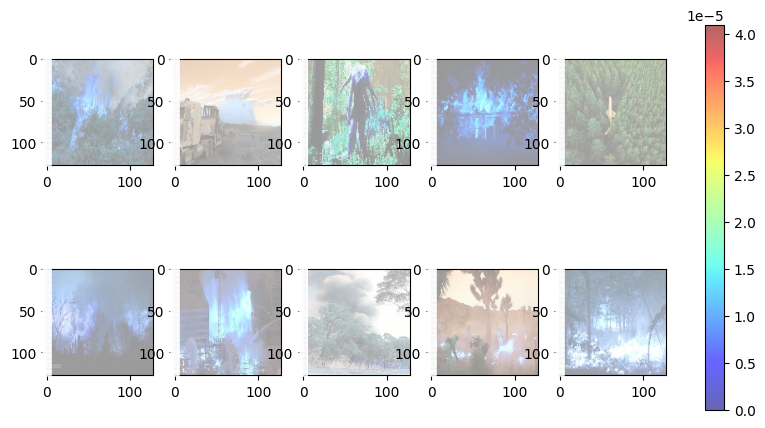

In [28]:
import shap
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

data_to_explain = X_test[:10]

shap_values = explainer.shap_values(data_to_explain)

shap_values = [np.clip(sv, 0, 1) for sv in shap_values]

num_images = len(data_to_explain)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))

for i, ax in enumerate(axes.flatten()):
    if i < num_images:
        im = ax.imshow(shap_values[0][i], cmap='jet', alpha=0.6)
        ax.imshow(data_to_explain[i], cmap='gray', alpha=0.4)
        ax.axis('on')
        for x in range(shap_values[0][i].shape[0]):
            for y in range(shap_values[0][i].shape[1]):
                value = float(shap_values[0][i][x, y])
                text = ax.text(y, x, f"{value:.2f}",
                               ha="center", va="center", color="w", fontsize=3)
fig.colorbar(im, ax=axes.ravel().tolist())

plt.show()


In [29]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [30]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 4, 4, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,637,313 (93.98 MB)

 Trainable params: 1,049,601 (4.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [34]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7973 - loss: 0.4313 - val_accuracy: 0.9000 - val_loss: 0.4248
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8105 - loss: 0.4485 - val_accuracy: 0.8600 - val_loss: 0.3505
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8209 - loss: 0.4123 - val_accuracy: 0.8550 - val_loss: 0.3394
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8259 - loss: 0.3922 - val_accuracy: 0.8750 - val_loss: 0.3365
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8151 - loss: 0.3980 - val_accuracy: 0.8550 - val_loss: 0.3233
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8182 - loss: 0.4084 - val_accuracy: 0.8550 - val_loss: 0.3167
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8054 - loss: 0.3909 - val_accuracy: 0.8550 - val_loss: 0.3117
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.8513 - loss: 0.3657 - val_accuracy: 0.8600 - v

In [35]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8634 - loss: 0.2953
Test Accuracy: 86.00%


In [37]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import layers, models

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [38]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_128 (Functional)      │ (None, 4, 4, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1024)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,754,177 (14.32 MB)

 Trainable params: 525,313 (2.00 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [39]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 361ms/step - accuracy: 0.7494 - loss: 0.8969 - val_accuracy: 0.9350 - val_loss: 0.1526
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9502 - loss: 0.1214 - val_accuracy: 0.9650 - val_loss: 0.1143
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9718 - loss: 0.0811 - val_accuracy: 0.9650 - val_loss: 0.1065
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9809 - loss: 0.0595 - val_accuracy: 0.9750 - val_loss: 0.0996
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9941 - loss: 0.0385 - val_accuracy: 0.9800 - val_loss: 0.1109
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9928 - loss: 0.0220 - val_accuracy: 0.9700 - val_loss: 0.0990
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9899 - loss: 0.0259 - val_accuracy: 0.9750 - val_loss: 0.1044
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9995 - loss: 0.0123 - val_accuracy: 0.9750 

In [40]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9656 - loss: 0.1783
Test Accuracy: 98.00%


In [41]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


custom_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
base_model.trainable = False


custom_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

img_path = "/content/drive/MyDrive/fire_dataset/fire_images/fire.78.png"
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

img_array = preprocess_input(img_array)

print("Image shape:", img_array.shape)

prediction = custom_model.predict(img_array)

if prediction[0] > 0.5:
    print("🔥🔥🔥 Fire Detected 🔥🔥🔥")
else:
    print("No Fire Detected")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Image shape: (1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
🔥🔥🔥 Fire Detected 🔥🔥🔥


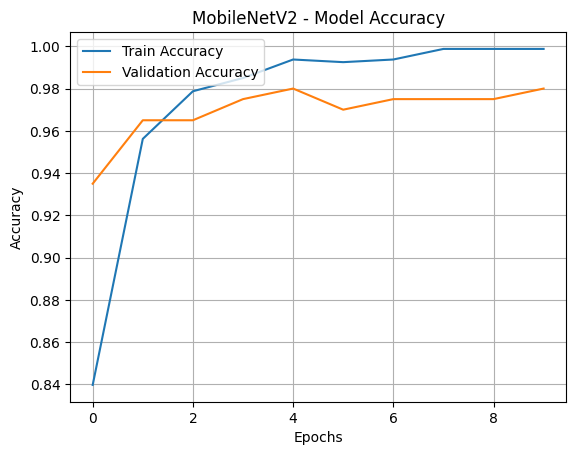

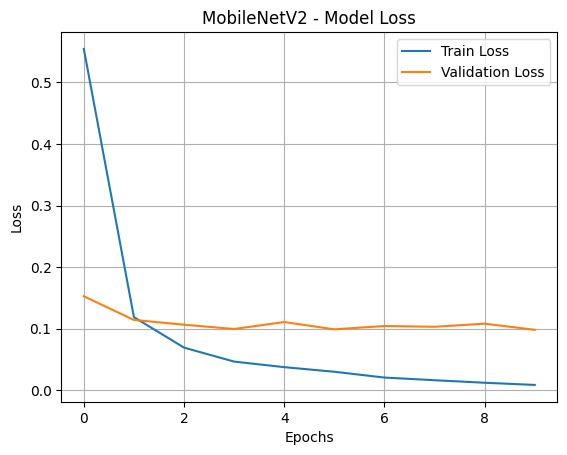

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNetV2 - Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('MobileNetV2 - Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 447ms/step


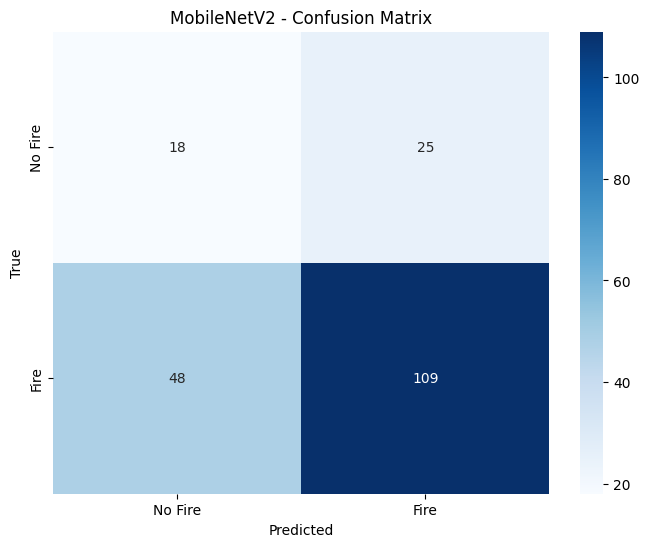

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

custom_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

base_model.trainable = False

custom_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



y_pred = custom_model.predict(X_test)

y_pred = (y_pred > 0.5)


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fire', 'Fire'], yticklabels=['No Fire', 'Fire'])
plt.title('MobileNetV2 - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()





In [58]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers, models

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()



80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 4, 4, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_13          │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,287,553 (77.39 MB)

 Trainable params: 263,169 (1.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [59]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 250ms/step - accuracy: 0.6893 - loss: 0.5961 - val_accuracy: 0.9150 - val_loss: 0.2572
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.8934 - loss: 0.2809 - val_accuracy: 0.9200 - val_loss: 0.1921
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.9159 - loss: 0.2050 - val_accuracy: 0.9400 - val_loss: 0.1774
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.9093 - loss: 0.1919 - val_accuracy: 0.9600 - val_loss: 0.1493
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.9237 - loss: 0.1898 - val_accuracy: 0.9350 - val_loss: 0.1677
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.9540 - loss: 0.1521 - val_accuracy: 0.9600 - val_loss: 0.1249
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.9666 - loss: 0.1235 - val_accuracy: 0.9550 - val_loss: 0.1187
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.9721 - loss: 0.1023 - val_accuracy: 0.

In [61]:
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 98.00%


In [62]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


custom_model = tf.keras.Sequential([
    model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

img_path = "/content/drive/MyDrive/fire_dataset/fire_images/fire.78.png"
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

img_array = preprocess_input(img_array)

print(img_array.shape)


prediction = custom_model.predict(img_array)


if prediction[0] > 0.5:
    print("🔥🔥🔥 Fire Detected 🔥🔥🔥")
else:
    print("No Fire Detected")


(1, 128, 128, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
🔥🔥🔥 Fire Detected 🔥🔥🔥


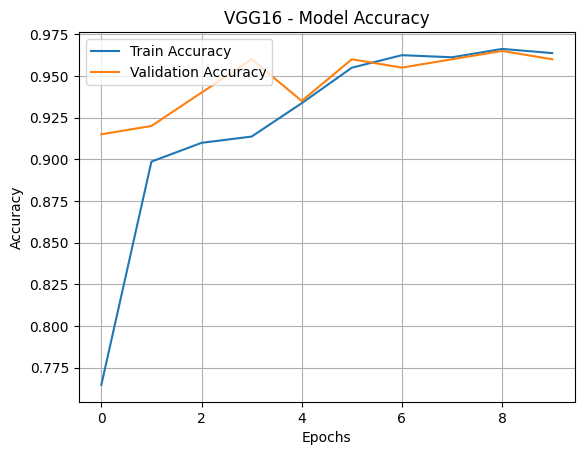

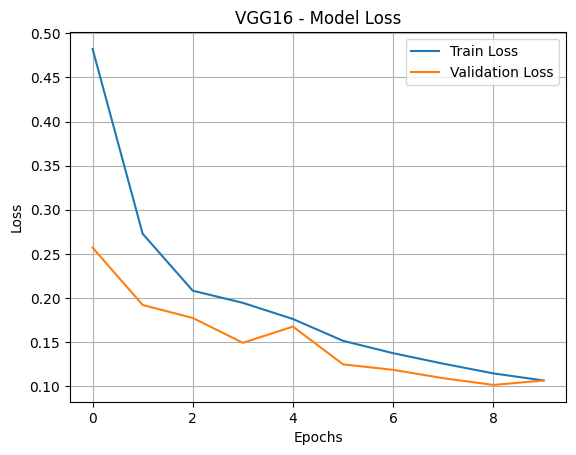

In [66]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16 - Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('VGG16 - Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [73]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers, models

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(128, 128, 3))


base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test)



print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 4, 4, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_21          │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,287,553 (77.39 MB)

 Trainable params: 263,169 (1.00 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 187ms/step - accuracy: 0.7883 - loss: 0.5298 - val_accuracy: 0.9100 - val_loss: 0.2430
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.8998 - loss: 0.2650 - val_accuracy: 0.9150 - val_loss: 0.1920
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.9204 - loss: 0.2134 - val_accuracy: 0.9400 - val_loss: 0.1717
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.9317 - loss: 0.1698 - val_accuracy: 0.9450 - val_loss: 0.1492
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.9383 - loss: 0.1703 - val_accuracy: 0.9500 - val_loss: 0.1385
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.9436 - loss: 0.1518 - val_accuracy: 0.9550 - val_loss: 0.1276
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.9478 - loss: 0.1491 - val_accuracy: 0.9450 - val_loss: 0.1436
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9540 - loss: 0.1317 - val_accuracy: 0.95